In [10]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as data

In [18]:


# Define the ticker symbol
ticker_symbol = "AAPL"  # Example: Apple Inc.

# Fetch historical data
data = data.download(ticker_symbol, start="2013-01-01", end="2023-12-31")

# Display the first few rows of the data
print(data.head())



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.747721  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.536327  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.075714  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.981151  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.024158  458707200


In [19]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [20]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.747721,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.536327,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.075714,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.981151,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.024158,458707200


In [21]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


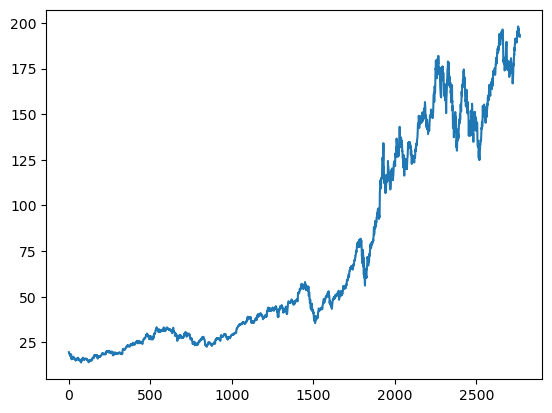

In [22]:
plt.plot(df.Close)

In [23]:
df

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...
2763,195.179993,195.410004,192.970001,193.600006,37122800
2764,193.610001,193.889999,192.830002,193.050003,28919300
2765,192.490005,193.500000,191.089996,193.149994,48087700
2766,194.139999,194.660004,193.169998,193.580002,34049900


In [24]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    181.768301
2764    181.787101
2765    181.898701
2766    182.046001
2767    182.173301
Name: Close, Length: 2768, dtype: float64

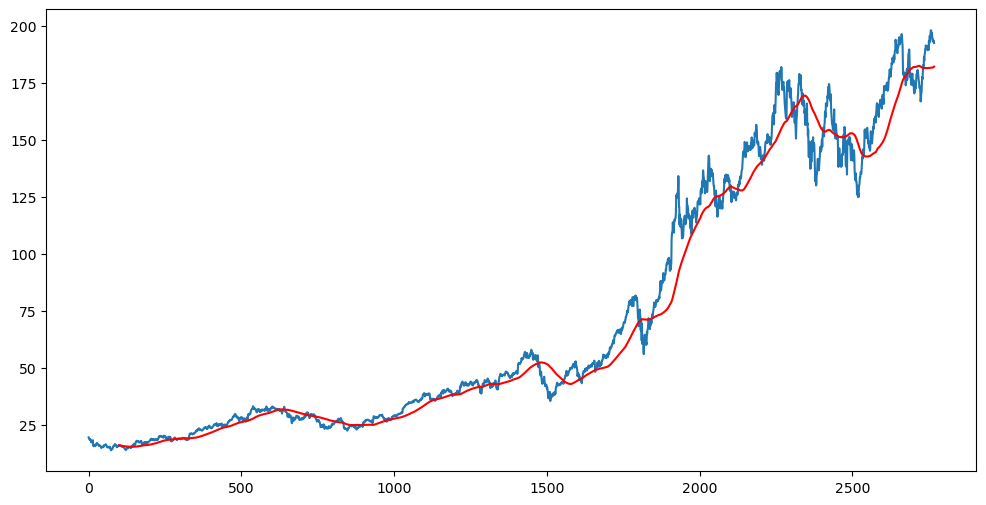

In [25]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [26]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    178.649100
2764    178.871851
2765    179.085250
2766    179.290201
2767    179.487900
Name: Close, Length: 2768, dtype: float64

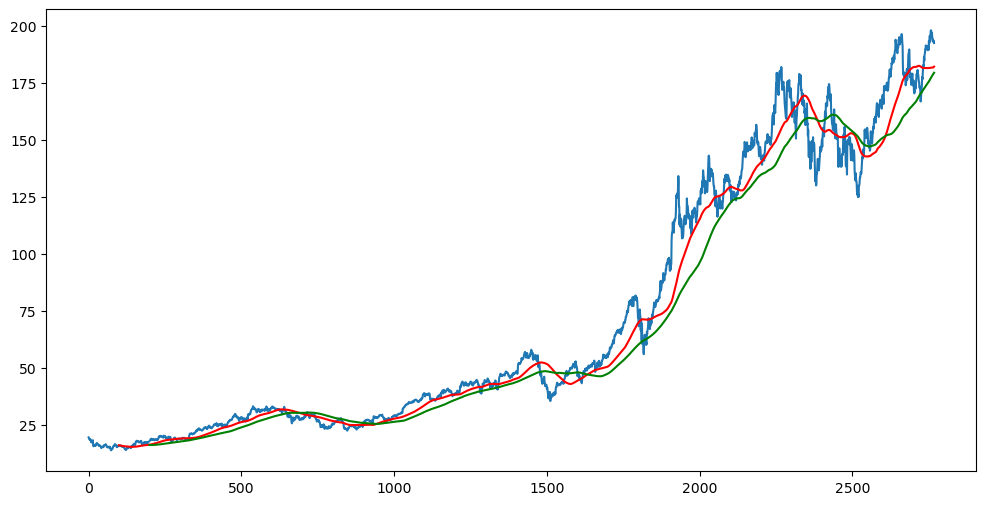

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [28]:
df.shape

(2768, 5)

In [29]:
#splitting Data into Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [30]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [31]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.82234426],
       [0.85977174],
       [0.82791678]])

In [34]:
data_training_array.shape

(1937, 1)

In [35]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [37]:
!pip install tensorflow

In [38]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential  

In [42]:

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu',))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [43]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - loss: 0.0246
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0036
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0025
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0021
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0025
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0020
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0021
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0020
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0017
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 0.0017
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0017
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0019
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0021
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.0015
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - l

In [50]:
model.save('keras_model.h5')

In [51]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [53]:
data_training.tail

<bound method NDFrame.tail of            Close
0      19.608213
1      19.360714
2      18.821428
3      18.710714
4      18.761070
...          ...
1932  120.879997
1933  120.959999
1934  112.820000
1935  117.320000
1936  113.489998

[1937 rows x 1 columns]>

In [54]:
past_100_days = data_training.tail(100)

In [61]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [62]:
final_df.head()

,Close
0,67.092499
1,69.025002
2,68.757500
3,70.742500
4,70.792503


In [63]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01474996],
       [0.01270823],
       [0.02785889],
       [0.02824054],
       [0.01948211],
       [0.03694166],
       [0.04852404],
       [0.03949856],
       [0.04730286],
       [0.05569867],
       [0.06155668],
       [0.06749097],
       [0.07968403],
       [0.08899577],
       [0.08212645],
       [0.07495182],
       [0.07855823],
       [0.0750663 ],
       [0.08890033],
       [0.08542756],
       [0.09704813],
       [0.09250675],
       [0.09639937],
       [0.09227778],
       [0.09491097],
       [0.09517813],
       [0.09458661],
       [0.10204746],
       [0.10489057],
       [0.10828706],
       [0.10294429],
       [0.12046101],
       [0.12420096],
       [0.14429369],
       [0.16118076],
       [0.12885683],
       [0.13439043],
       [0.14238555],
       [0.15973055],
       [0.15879558],
       [0.15906275],
       [0.15522736],
       [0.17268685],
       [0.18730323],
       [0.17495755],
       [0.18407846],
       [0.162

In [64]:
input_data.shape

(931, 1)

In [65]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [66]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [67]:
# Making Predictions

y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step


In [68]:
y_predicted.shape

(831, 1)

In [69]:
y_test

array([0.34275956, 0.36840499, 0.36977886, 0.34375177, 0.33008947,
       0.30337548, 0.32810504, 0.34130935, 0.30551265, 0.31390846,
       0.34489667, 0.36535195, 0.3587116 , 0.37183963, 0.37931957,
       0.35054475, 0.37710612, 0.35161337, 0.36626788, 0.3654283 ,
       0.38069343, 0.43740342, 0.41221592, 0.41290288, 0.40923922,
       0.39634016, 0.37313721, 0.38481503, 0.37993019, 0.37138169,
       0.36596257, 0.36603892, 0.37786936, 0.33665348, 0.36809968,
       0.3187933 , 0.31810634, 0.33085277, 0.36527561, 0.3964165 ,
       0.39382146, 0.37573225, 0.37306086, 0.39992748, 0.39779037,
       0.39817202, 0.4061099 , 0.39916423, 0.38878394, 0.39343981,
       0.38351745, 0.3568798 , 0.36695479, 0.3735188 , 0.37779302,
       0.39656919, 0.4245807 , 0.42732843, 0.42625987, 0.42099338,
       0.43244223, 0.43725073, 0.41740607, 0.42854961, 0.42221462,
       0.41740607, 0.46396472, 0.46343044, 0.47022342, 0.45465304,
       0.46663611, 0.49449505, 0.4874731 , 0.49518195, 0.53120

In [70]:
y_predicted

array([[0.4270864 ],
       [0.4175693 ],
       [0.4057998 ],
       [0.3931024 ],
       [0.38032556],
       [0.3679633 ],
       [0.3561182 ],
       [0.34508544],
       [0.33530676],
       [0.3267905 ],
       [0.31951615],
       [0.31368986],
       [0.30959374],
       [0.30727187],
       [0.3068425 ],
       [0.30832806],
       [0.3113073 ],
       [0.31545812],
       [0.32020828],
       [0.32513744],
       [0.32992366],
       [0.33448985],
       [0.33938366],
       [0.34486797],
       [0.35097504],
       [0.35750607],
       [0.3639561 ],
       [0.3695222 ],
       [0.3737381 ],
       [0.37638998],
       [0.3773452 ],
       [0.37660277],
       [0.37435967],
       [0.3711242 ],
       [0.36686248],
       [0.36202914],
       [0.3565737 ],
       [0.35051218],
       [0.34407434],
       [0.33797234],
       [0.33300325],
       [0.3297656 ],
       [0.32841432],
       [0.32878608],
       [0.33081555],
       [0.3343332 ],
       [0.33907413],
       [0.344

In [71]:
scaler.scale_

array([0.00763257])

In [72]:
scale_factor = 1/0.00763257
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

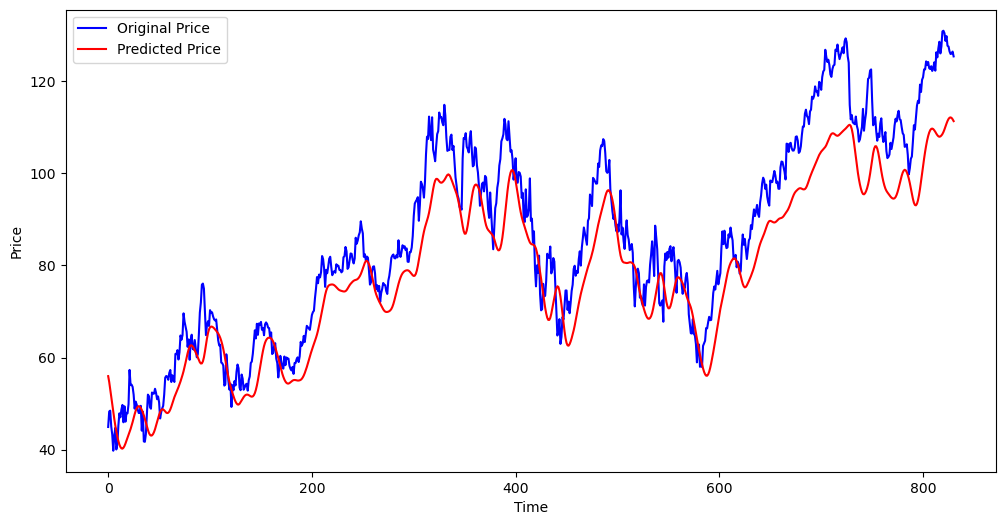

In [74]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9b/ea/7219c01b5e92d02d2bc994a36245d99331cd66eb12d284707a2060a013d0/streamlit-1.32.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc4